# Exercise 4: Conditional Graph

In [1]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END

In [2]:
ADDITION_NODE_1 = "addition_node_1"
SUBTRACTION_NODE_1 = "subtraction_node_1"
ROUTER_NODE_1 = "router_node_1"

ROUTE_TO_ADDITION_NODE_1 = "add_numbers_on_node_1"
ROUTE_TO_SUBTRACTION_NODE_1 = "subtract_numbers_on_node_1"

ADDITION_NODE_2 = "addition_node_2"
SUBTRACTION_NODE_2 = "subtraction_node_2"
ROUTER_NODE_2 = "router_node_2"

ROUTE_TO_ADDITION_NODE_2 = "add_numbers_on_node_2"
ROUTE_TO_SUBTRACTION_NODE_2 = "subtract_numbers_on_node_2"

In [3]:
class ConditionalGraphAgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: Literal["+", "-"]
    operation2: Literal["+", "-"]
    final_number_1: int
    final_number_2: int

In [4]:
def addition_node1_function(state: ConditionalGraphAgentState) -> ConditionalGraphAgentState:
    """Returns the sum of two given numbers"""

    state["final_number_1"] = state["number1"] + state["number2"]

    return state


def subtraction_node1_function(state: ConditionalGraphAgentState) -> ConditionalGraphAgentState:
    """Returns the subtraction of two given numbers"""

    state["final_number_1"] = state["number1"] - state["number2"]

    return state


def router_node1_function(state: ConditionalGraphAgentState) -> str:
    """Routing node that choses the next step in the graph"""

    if "+" == state["operation1"]:
        return ROUTE_TO_ADDITION_NODE_1
    else:
        return ROUTE_TO_SUBTRACTION_NODE_1

In [5]:
def addition_node2_function(state: ConditionalGraphAgentState) -> ConditionalGraphAgentState:
    """Returns the sum of two given numbers"""

    state["final_number_2"] = state["number3"] + state["number4"]

    return state


def subtraction_node2_function(state: ConditionalGraphAgentState) -> ConditionalGraphAgentState:
    """Returns the subtraction of two given numbers"""

    state["final_number_2"] = state["number3"] - state["number4"]

    return state


def router_node2_function(state: ConditionalGraphAgentState) -> str:
    """Routing node that choses the next step in the graph"""

    if "+" == state["operation2"]:
        return ROUTE_TO_ADDITION_NODE_2
    else:
        return ROUTE_TO_SUBTRACTION_NODE_2

In [6]:
graph = StateGraph(ConditionalGraphAgentState)

graph.add_node(ADDITION_NODE_1, addition_node1_function)
graph.add_node(SUBTRACTION_NODE_1, subtraction_node1_function)
graph.add_node(ROUTER_NODE_1, lambda state: state)
graph.add_node(ADDITION_NODE_2, addition_node2_function)
graph.add_node(SUBTRACTION_NODE_2, subtraction_node2_function)
graph.add_node(ROUTER_NODE_2, lambda state: state)

graph.add_edge(START, ROUTER_NODE_1)
graph.add_conditional_edges(
    ROUTER_NODE_1,
    router_node1_function,
    {
        ROUTE_TO_ADDITION_NODE_1: ADDITION_NODE_1,
        ROUTE_TO_SUBTRACTION_NODE_1: SUBTRACTION_NODE_1
    }
)
graph.add_edge(ADDITION_NODE_1, ROUTER_NODE_2)
graph.add_edge(SUBTRACTION_NODE_1, ROUTER_NODE_2)
graph.add_conditional_edges(
    ROUTER_NODE_2,
    router_node2_function,
    {
        ROUTE_TO_ADDITION_NODE_2: ADDITION_NODE_2,
        ROUTE_TO_SUBTRACTION_NODE_2: SUBTRACTION_NODE_2
    }
)
graph.add_edge(ADDITION_NODE_2, END)
graph.add_edge(SUBTRACTION_NODE_2, END)

agent = graph.compile()

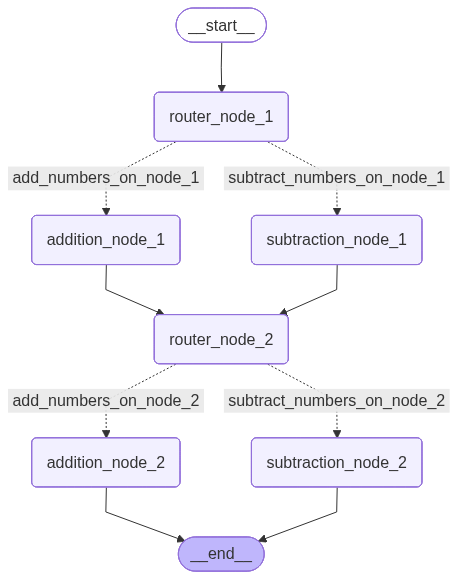

In [7]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [8]:
state = ConditionalGraphAgentState(
    number1=1,
    number2=2,
    number3=3,
    number4=5,
    operation1="+",
    operation2="-"
)

print(agent.invoke(state))

{'number1': 1, 'number2': 2, 'number3': 3, 'number4': 5, 'operation1': '+', 'operation2': '-', 'final_number_1': 3, 'final_number_2': -2}
